In [2]:
from job_shop_lib.dispatching.feature_observers import (
    FeatureObserverType,
)
from job_shop_lib.graphs import build_resource_task_graph
from job_shop_lib.reinforcement_learning import (
    SingleJobShopGraphEnv,
    ResourceTaskGraphObservation,
    get_optimal_actions,
)
from job_shop_lib.dispatching import OptimalOperationsObserver
from job_shop_lib import JobShopInstance
from job_shop_lib.constraint_programming import ORToolsSolver
from job_shop_lib.visualization.gantt import plot_gantt_chart
from job_shop_lib.visualization.graphs import plot_resource_task_graph

from IPython.display import clear_output
import matplotlib.pyplot as plt

In [3]:
instance_dict = {
    "name": "classic_generated_instance_498",
    "duration_matrix": [[9, 3, 2], [6, 1, 2], [10, 1, 6], [6, 3, 7]],
    "machines_matrix": [[2, 1, 0], [2, 0, 1], [1, 2, 0], [1, 2, 0]],
    "metadata": {},
}
instance = JobShopInstance.from_matrices(**instance_dict)
schedule = ORToolsSolver()(instance)

In [4]:
features_observers_types = [
    FeatureObserverType.DURATION,
    FeatureObserverType.EARLIEST_START_TIME,
    FeatureObserverType.IS_SCHEDULED,
    FeatureObserverType.POSITION_IN_JOB,
    FeatureObserverType.REMAINING_OPERATIONS,
]

In [ ]:
graph = build_resource_task_graph(schedule.instance)
env = SingleJobShopGraphEnv(
    graph,
    feature_observer_configs=features_observers_types,
    render_mode="human",
    render_config={
        "partial_gantt_chart_plotter_config": {
            "show_available_operations": True
        }
    },
)
env = ResourceTaskGraphObservation(env)
optimal_ops_observer = OptimalOperationsObserver(
    env.unwrapped.dispatcher, schedule
)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Gantt Chart for classic_generated_instance_498 instance'}, xlabel='Time units', ylabel='Machines'>)

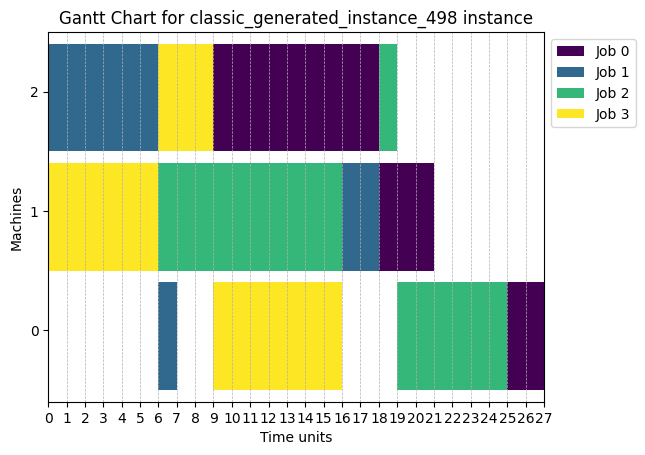

In [6]:
plot_gantt_chart(schedule)

{(4, 1, 1): 0, (5, 1, 2): 0, (8, 2, 3): 0}


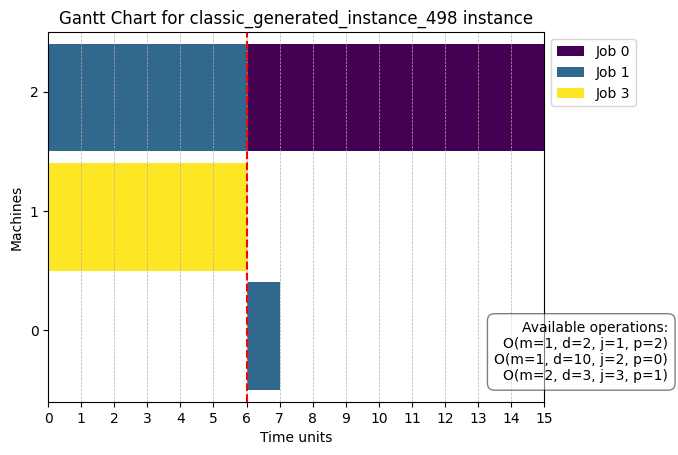

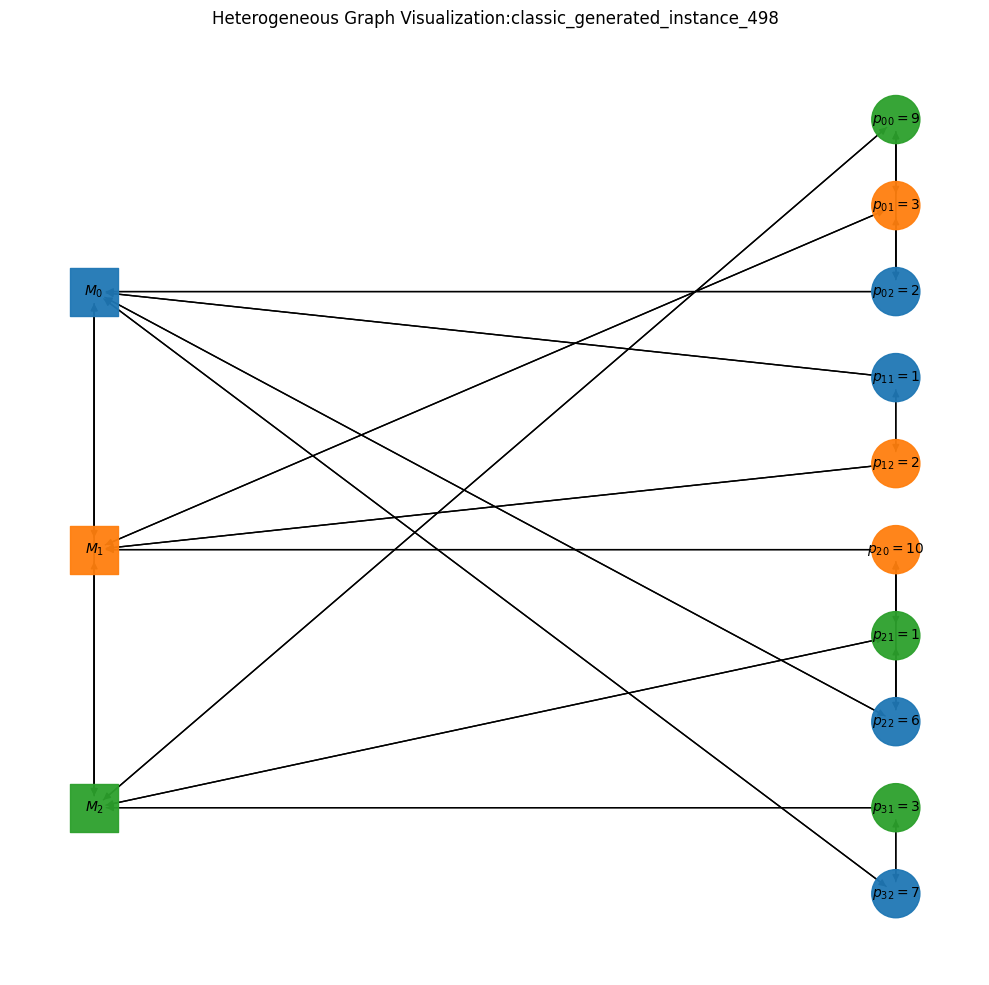

ValueError: invalid literal for int() with base 10: ''

In [8]:
obs, info = env.reset()
done = False
while not done:
    action_probs = get_optimal_actions(
        optimal_ops_observer, info["available_operations_with_ids"]
    )
    print(action_probs)
    env.render()
    plot_resource_task_graph(env.unwrapped.job_shop_graph)
    plt.show()

    job_id = int(input("Select job_id: "))
    obs, reward, done, _, info = env.step((job_id, -1))
    clear_output()

In [ ]:
env.unwrapped.dispatcher.subscribers[-5].remaining_ops_per_machine

array([[3.],
       [0.],
       [1.]], dtype=float32)